In [1]:
import numpy as np
import pandas as pd
from math import sin, cos
from pandas import MultiIndex
import matplotlib.pyplot as plt

from plot import plot_values
from gradient_descent import gradient_descent, gradient_armijo_descent
from fastest_descent import fastest_descent
from conjugate_gradient import conjugate_gradient_descent
from random_quadratic_function import random_quadratic_function

In [2]:
def f1(point):
    x, y = point
    return 2*x**2 + y**2
def grad1(point):
    x, y = point
    return np.array([4*x, 2*y])

def f2(point):
    x, y = point
    return 2*x**2 + y**2 + 2*x*y
def grad2(point):
    x, y = point
    return np.array([4*x + 2*y, 2*x + 2*y])

Сравнение алгоритмов с разным шагом

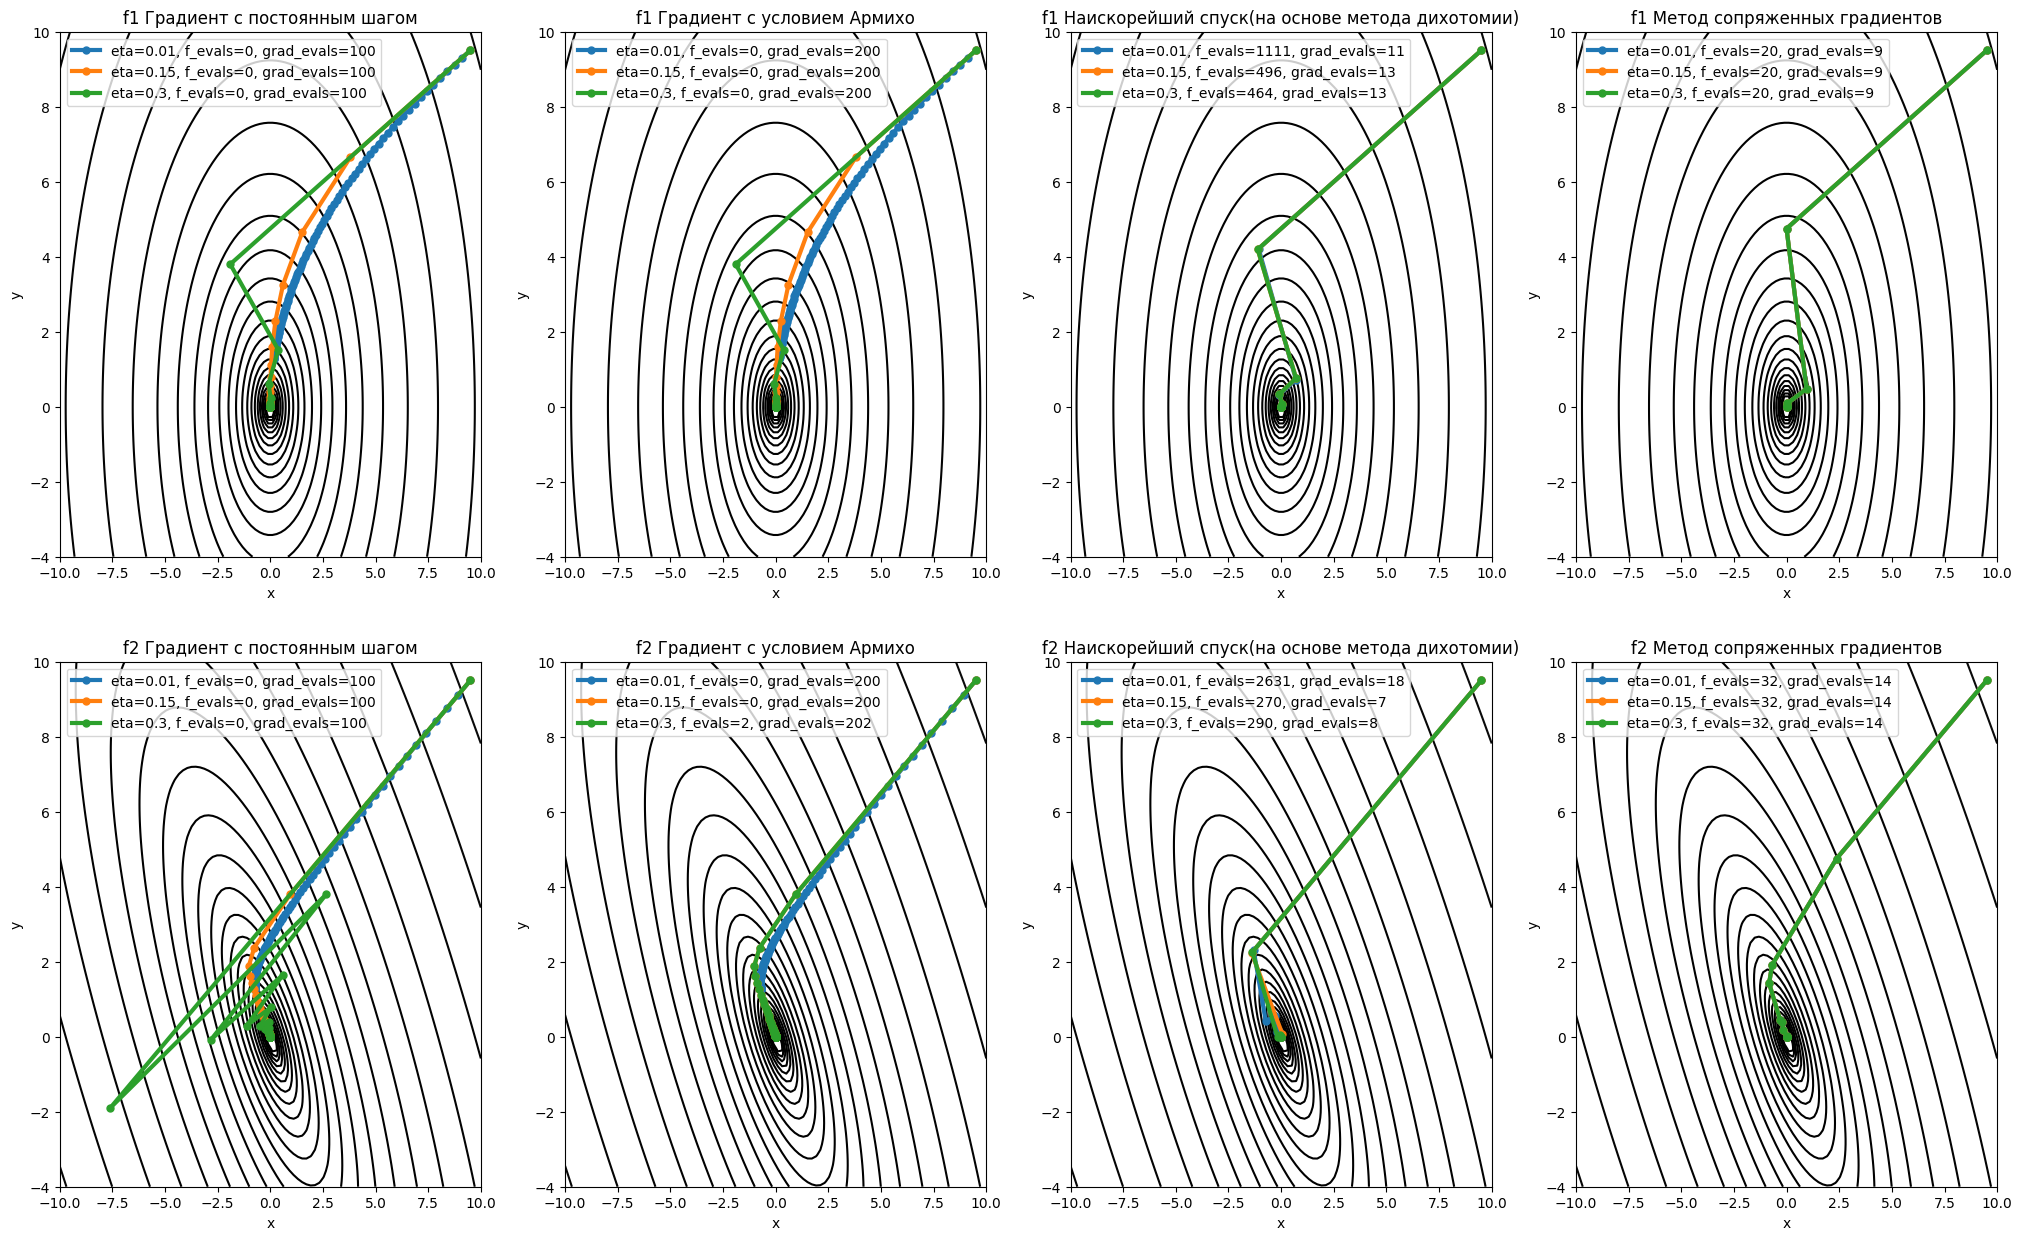

In [3]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-4, 10, 100)
X, Y = np.meshgrid(x, y)
levels = np.logspace(-1, 4, 30)
functions = [f1, f2]
gradients = [grad1, grad2]
etas = [0.01, 0.15, 0.3]
methods = [gradient_descent, gradient_armijo_descent, fastest_descent, conjugate_gradient_descent]
titles = [
    'Градиент с постоянным шагом', 
    'Градиент с условием Армихо', 
    'Наискорейший спуск(на основе метода дихотомии)', 
    'Метод сопряженных градиентов'
]

x_init = np.array([9.5, 9.5])
fig, axes = plt.subplots(nrows=2, ncols=len(methods), figsize=(25, 15))
for i, (f, grad) in enumerate(zip(functions, gradients)):
    for j, (method, title) in enumerate(zip(methods, titles)):
        ax = axes[i][j]
        ax.set_title(f"{f.__name__} {title}")
        ax.contour(X, Y, f([X, Y]), levels=levels, cmap='gray')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        for eta in etas:
            trajectory, f_evals, grad_evals, _ = method(f, grad, x_init, step=eta, iterations=100)
            label = f"eta={eta}, f_evals={f_evals}, grad_evals={grad_evals}"
            ax.plot(np.array(trajectory)[:, 0], np.array(trajectory)[:, 1], '-o', markersize=5, linewidth=3, label=label)
        ax.legend()

plt.show()

Сравнение работы алгоритмов в зависимости от начальной точки

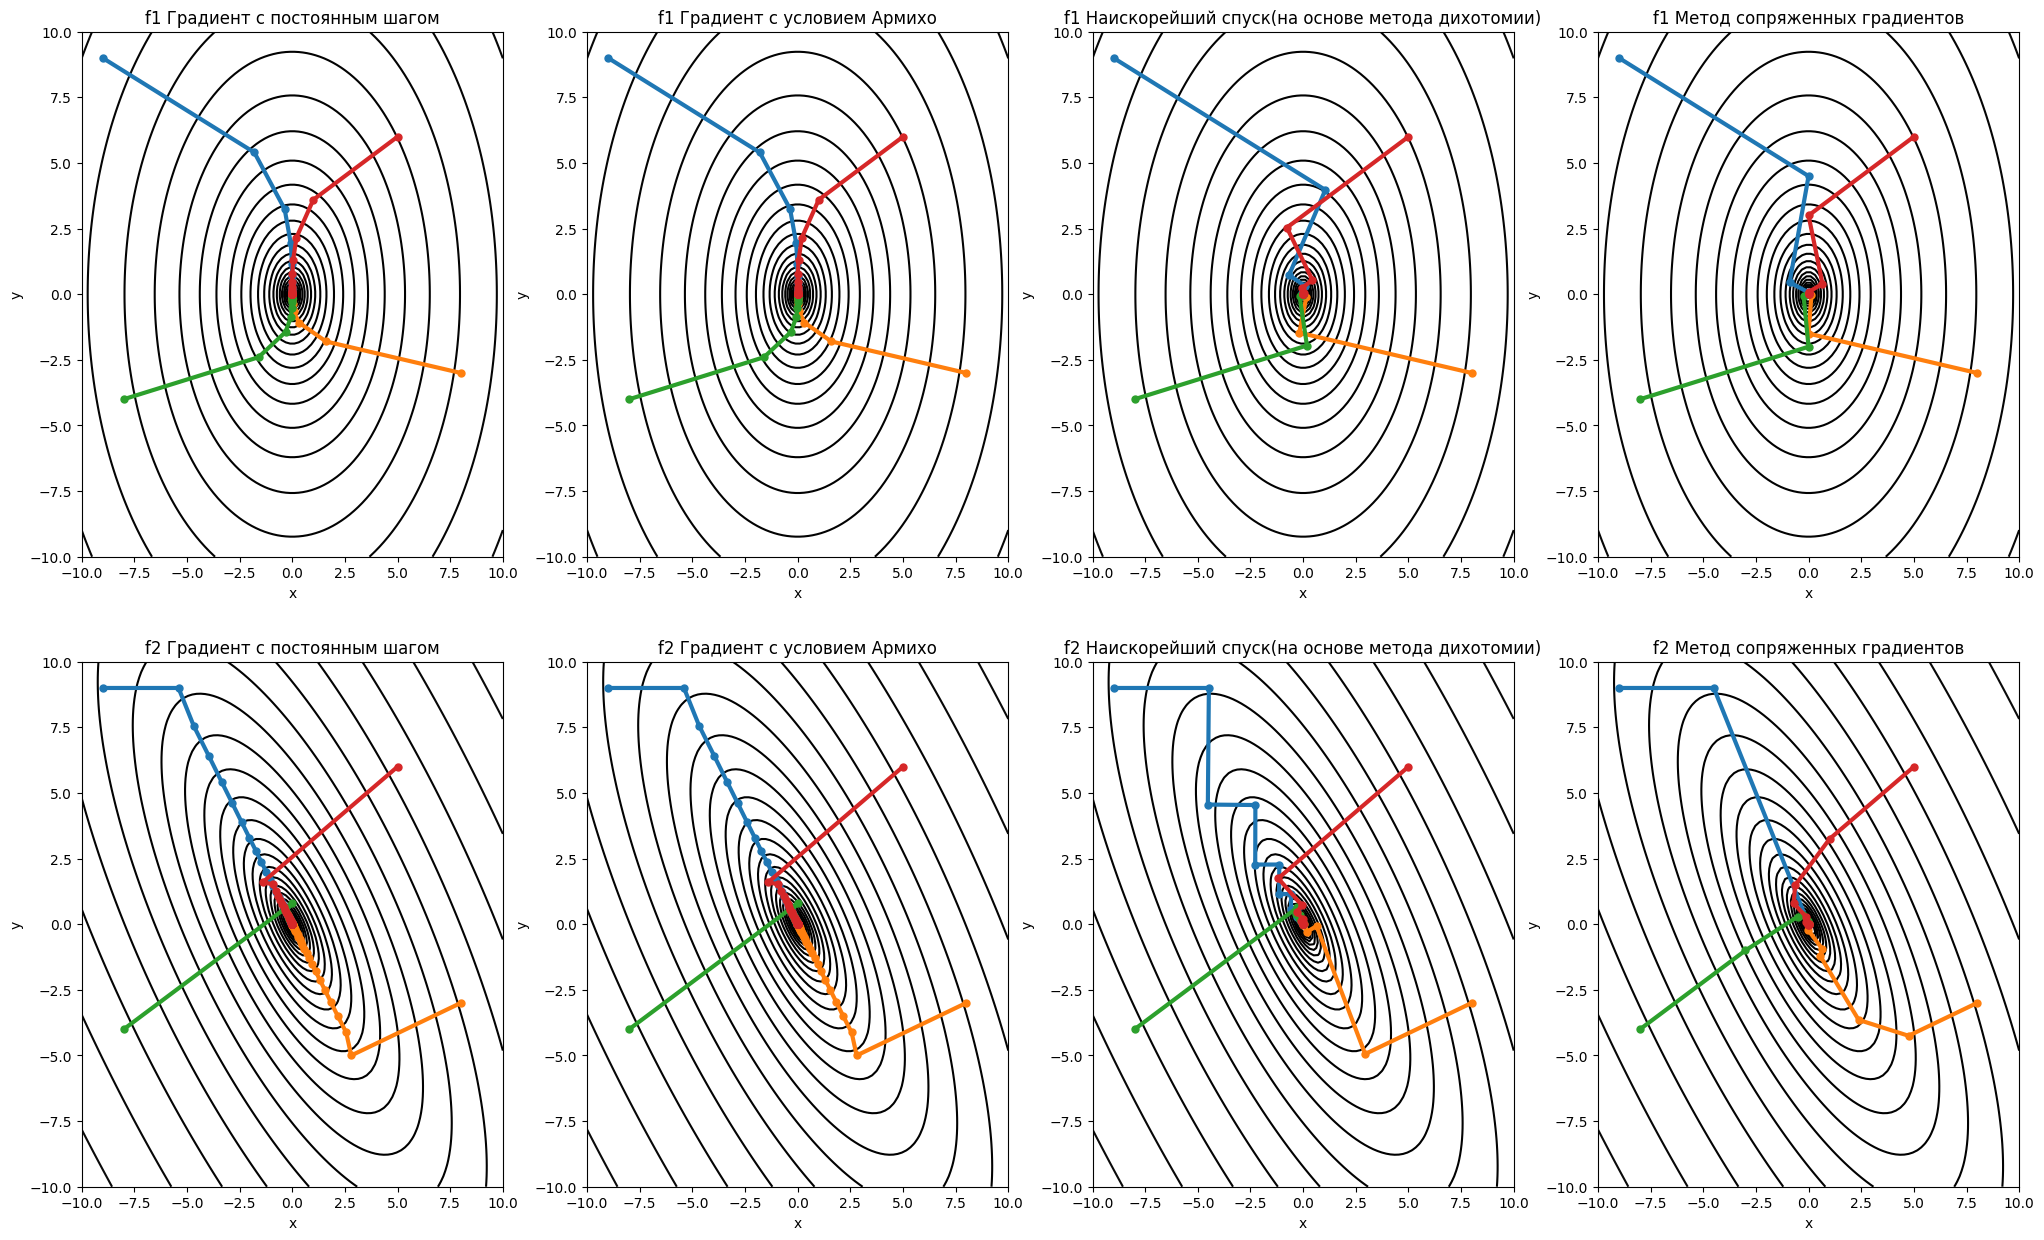

In [6]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

eta = 0.2
fig, axes = plt.subplots(nrows=2, ncols=len(methods), figsize=(25, 15))
for i, (f, grad) in enumerate(zip(functions, gradients)):
    for j, (method, title) in enumerate(zip(methods, titles)):
        ax = axes[i][j]
        ax.set_title(f"{f.__name__} {title}")
        ax.contour(X, Y, f([X, Y]), levels=levels, cmap='gray')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        for x_init in [(-9, 9), (8, -3), (-8, -4), (5, 6)]:
            trajectory, f_evals, grad_evals, _ = method(f, grad, x_init, step=eta, iterations=100)
            ax.plot(np.array(trajectory)[:, 0], np.array(trajectory)[:, 1], '-o', markersize=5, linewidth=3, label="")

plt.show()

Исследование зависимости числа итераций, необходимых алгоритму сопряженных градиентов для сходимости в зависимости от размерности пространства и числа обусловленности оптимизируемой функции

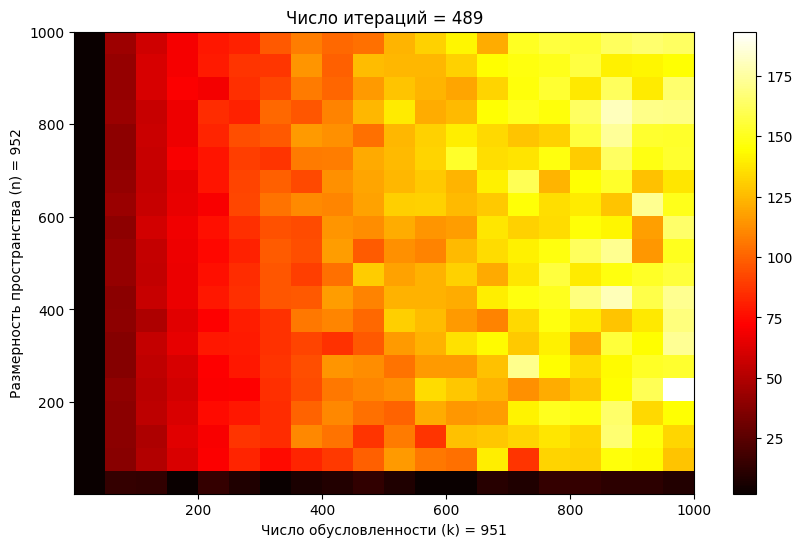

In [5]:
n_values = np.arange(2, 1000, 50)
k_values = np.arange(1, 1000, 50)

tries = 3
iterations_count = np.zeros((len(n_values), len(k_values)))

for n_idx, n in enumerate(n_values):
    for k_idx, k in enumerate(k_values):
        total_iterations = 0
        for i in range(tries):
            f, grad_f = random_quadratic_function(n, k)
            x0 = np.ones(n)
            _, _, _, iterations = conjugate_gradient_descent(f, grad_f, x0)
            total_iterations += iterations
        iterations_count[n_idx, k_idx] = total_iterations / tries

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(iterations_count, extent=[1, 1000, 2, 1000], aspect='auto', cmap='hot', origin='lower')
ax.set_xlabel(f'Число обусловленности (k) = {k}')
ax.set_ylabel(f'Размерность пространства (n) = {n}')
ax.set_title(f'Число итераций = {total_iterations}')
fig.colorbar(im)
plt.show()